# Chapter 4: The Seaborn essentials for data visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings

## Get the data

#### <font color='blue'>2. import the data from a pickle file and create a DataFrame named mortality_data. </font>

In [2]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


## General vs. specific

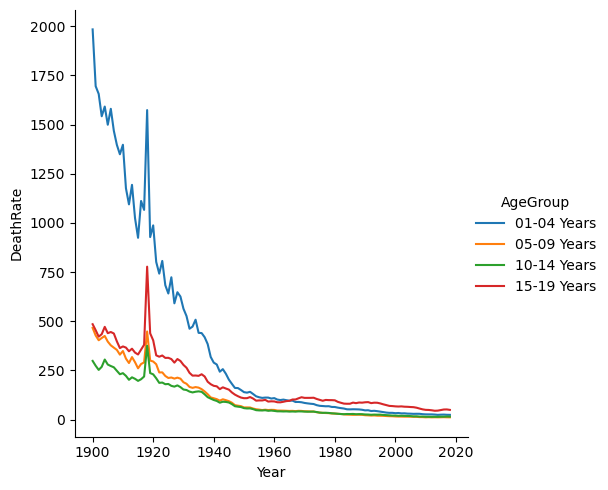

In [3]:
warnings.filterwarnings('ignore')
sns.relplot(data = mortality_data, kind = 'line', 
            x = 'Year', y = 'DeathRate', hue = 'AgeGroup')

<Axes: xlabel='Year', ylabel='DeathRate'>

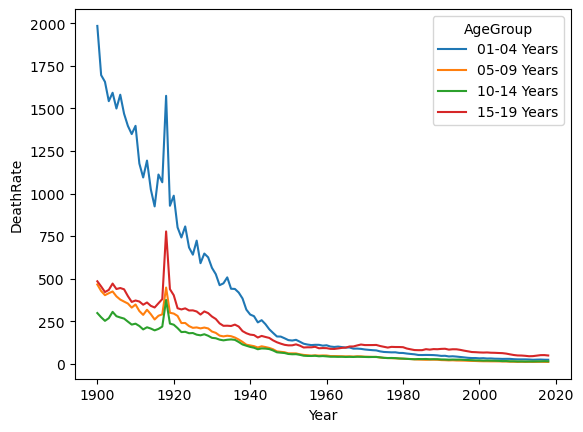

In [4]:
sns.lineplot(data = mortality_data, x = 'Year', y = 'DeathRate', hue = 'AgeGroup')

## Basic parameters

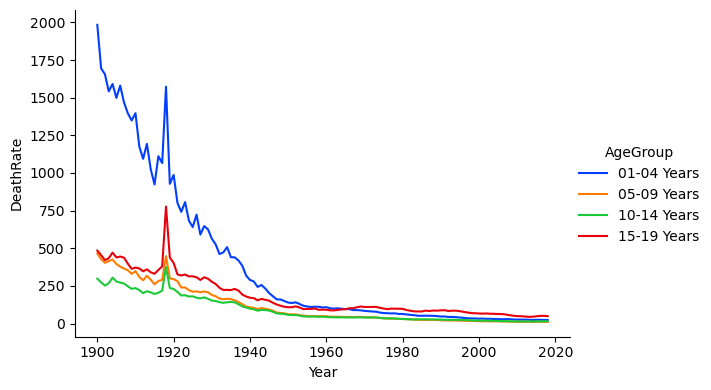

In [5]:
sns.relplot(data = mortality_data, kind = 'line',
            x='Year', y='DeathRate', hue='AgeGroup',
            palette = 'bright', height = 4, aspect = 1.5)

## Subplots
#### <font color='blue'>3. Change the aspect parameter for the plot in cell 6 to 2.</font>

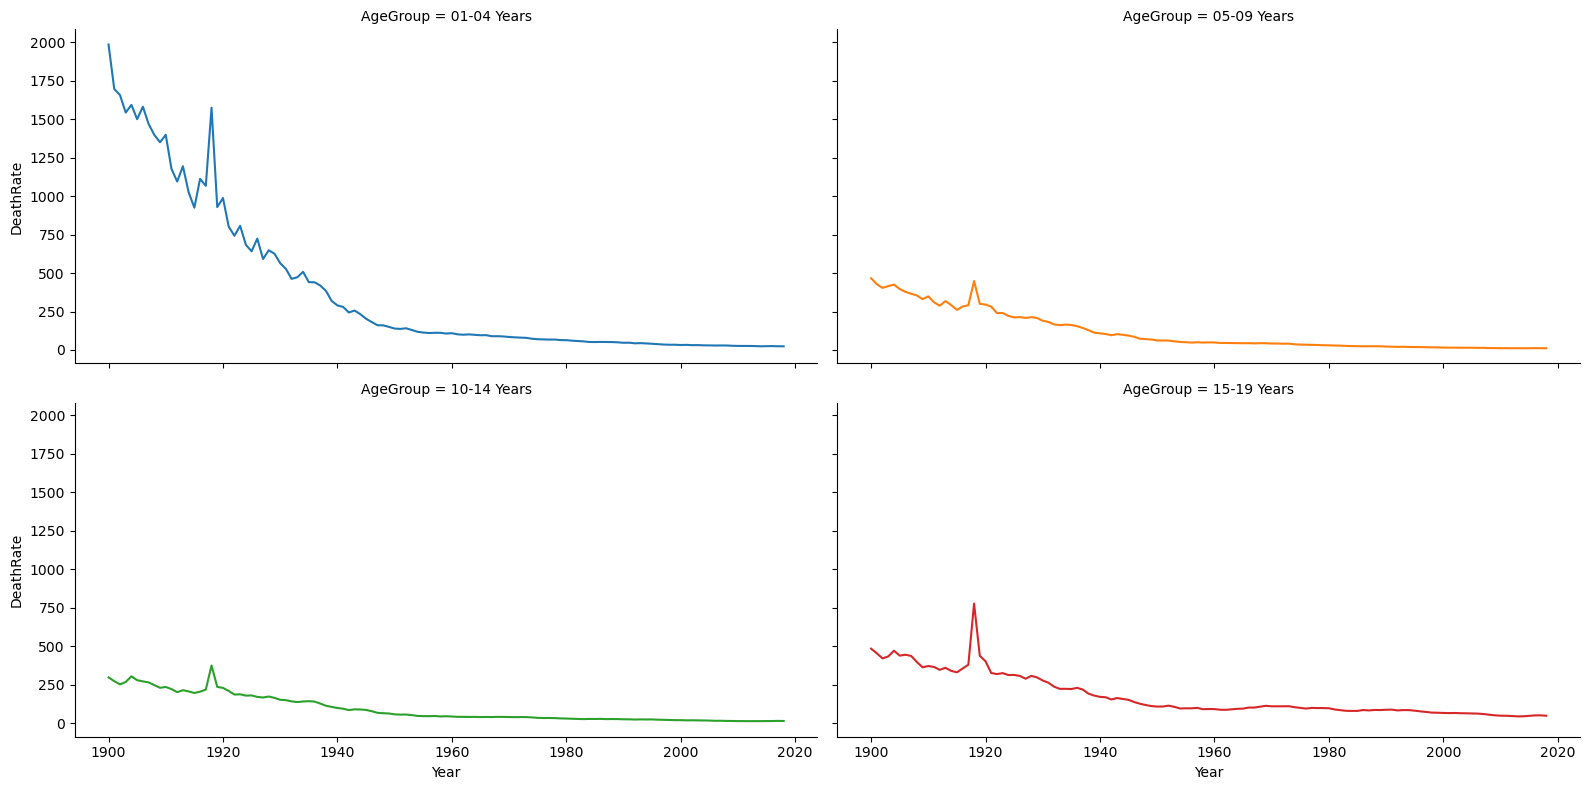

In [6]:
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', hue='AgeGroup',
            height = 4, aspect = 2, col = 'AgeGroup', col_wrap = 2, legend = False)

## Set the title and the x and y labels

### Specific plot

[Text(0.5, 1.0, 'Deaths by Age Group'), Text(0, 0.5, 'Deaths per 100,000')]

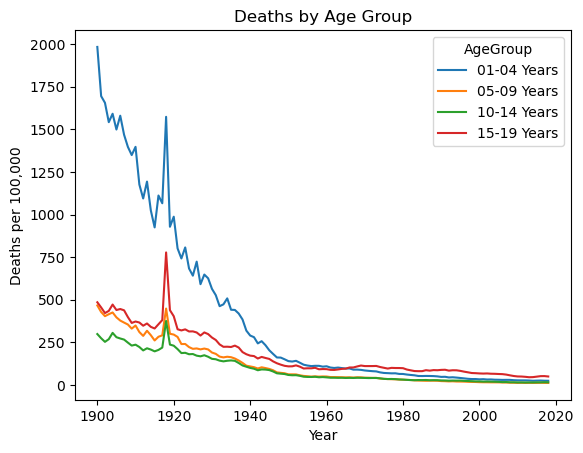

In [7]:
ax = sns.lineplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')
ax.set(title = 'Deaths by Age Group', ylabel = 'Deaths per 100,000')

### General plot

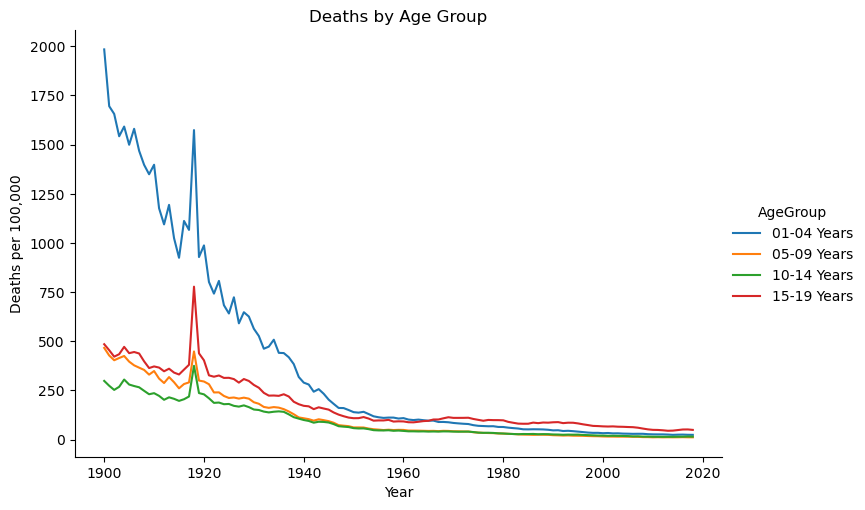

In [8]:
g = sns.relplot(data=mortality_data, kind='line',
                x='Year', y='DeathRate', hue='AgeGroup', aspect=1.5)
for ax in g.axes.flat: # .flat: A 1-D iterator over the array
    ax.set(title='Deaths by Age Group', ylabel='Deaths per 100,000')

## Set the ticks, x limits, and y limits

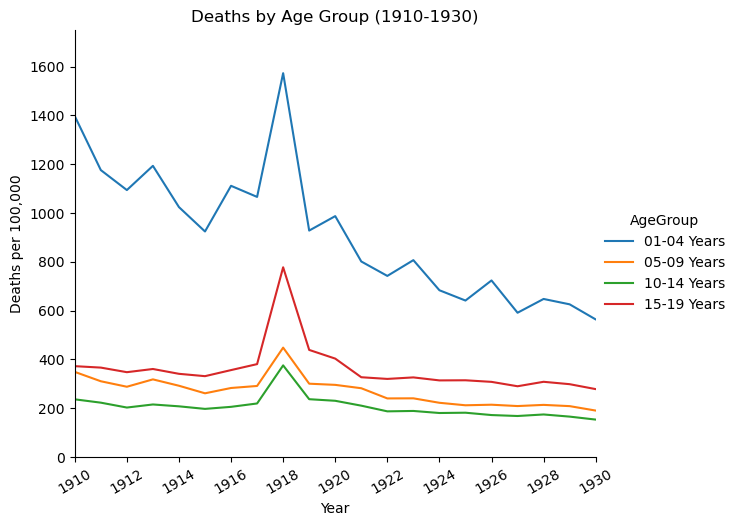

In [9]:
g = sns.relplot(data=mortality_data, kind='line',
                x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)
for ax in g.axes.flat:
    ax.set(title='Deaths by Age Group (1910-1930)', ylabel='Deaths per 100,000', 
           xticks = [x for x in range(1910, 1931, 2)],
           xlim = (1910,1930), ylim = (0, 1750))
    ax.tick_params('x', labelrotation = 30)

#### <font color='blue'>4. Change cell 10 so every fifth year is displayed on the x-axis for the plot and so the labels on the x-axis are displayed at their default rotation.</font>

[Text(0.5, 1.0, 'Deaths by Age Group (1910-1930)'),
 Text(0, 0.5, 'Deaths per 100,000'),
 (1910.0, 1930.0),
 (0.0, 1750.0)]

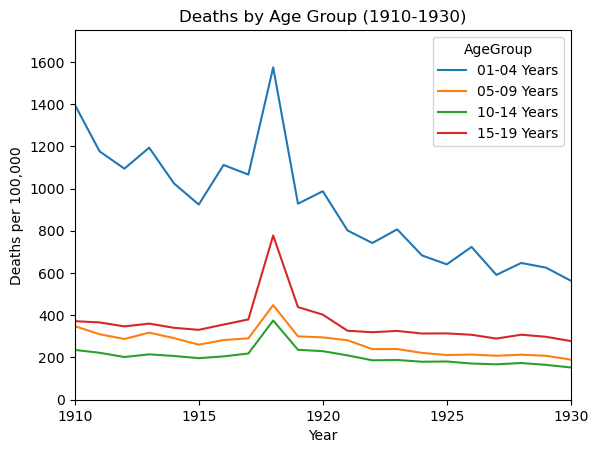

In [10]:
ax = sns.lineplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')
ax.set(title='Deaths by Age Group (1910-1930)', 
       ylabel='Deaths per 100,000',
       xticks = [x for x in range(1910,1931,5)],
       xlim=(1910,1930), ylim=(0,1750))
# ax.tick_params('x', labelrotation=30)

## Set the background style

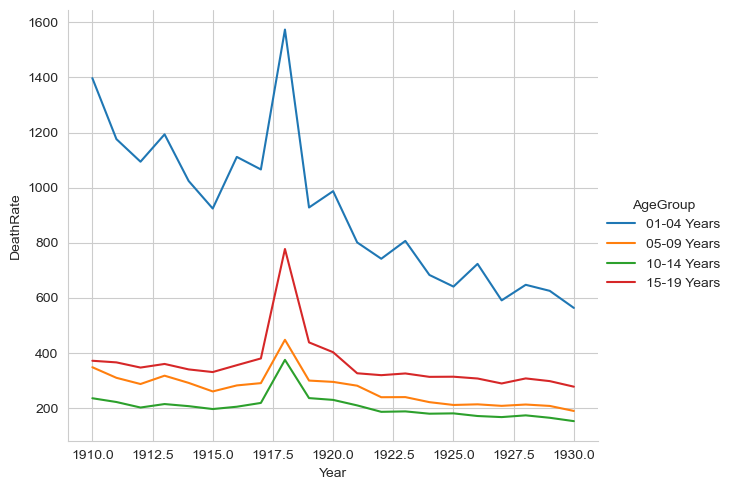

In [11]:
sns.set_style('whitegrid')
sns.relplot(data = mortality_data.query('Year >= 1910 and Year <= 1930'), kind = 'line',
            x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)

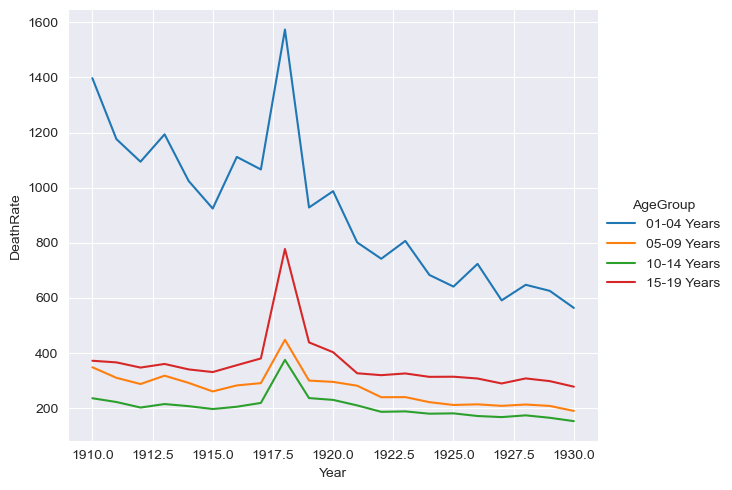

In [12]:
sns.set_style('darkgrid')
sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'), kind='line', 
            x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)
# sns.set_style('ticks') # just like default

## Use the set() and suptitle() methods with subplots

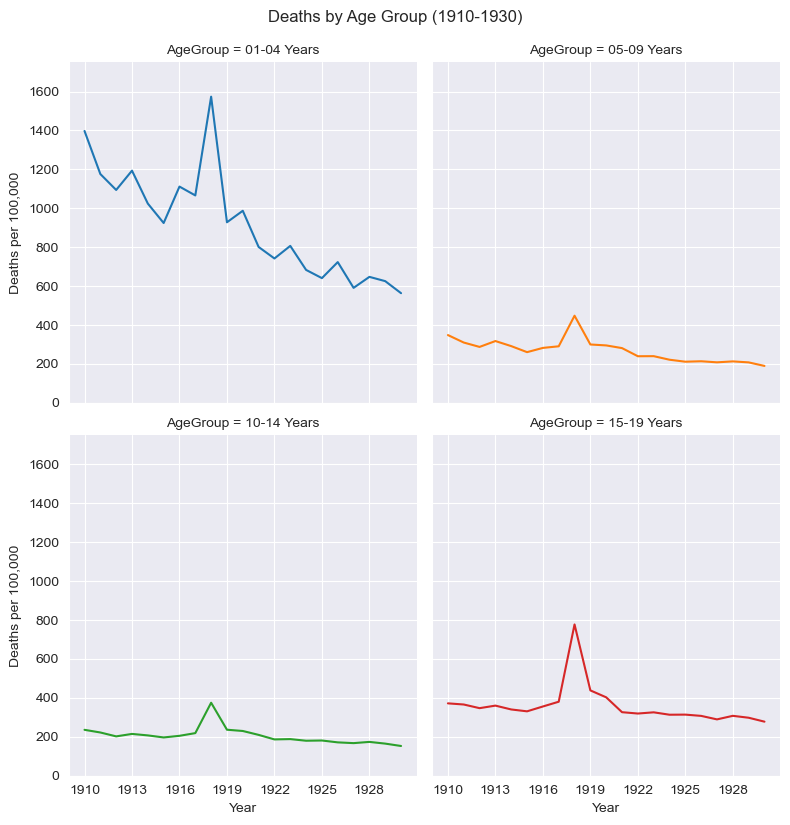

In [13]:
g = sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'), kind='line',
                x='Year', y='DeathRate', hue='AgeGroup', legend=False,
                col = 'AgeGroup', col_wrap = 2, height = 4)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y = 1.025)
# g.set(title = 'Deaths by Age Group (1910-1930)',
g.set(ylabel = 'Deaths per 100,000',
      xticks = [x for x in range(1910,1931,3)],
      ylim = (0, 1750))

## Save a plot to a file

### General plot

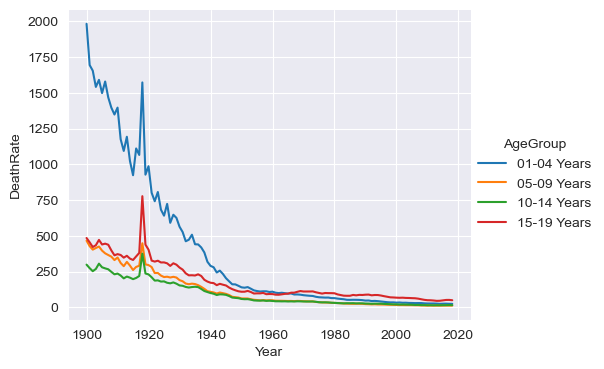

In [14]:
g = sns.relplot(data=mortality_data, kind='line',
                x='Year', y='DeathRate', hue='AgeGroup')
g.fig.subplots_adjust(bottom = 0.35)
# Adjust the subplot layout parameters.
# bottom (float): The position of the bottom edge of the subplots, as a fraction of the figure height.
g.savefig('lineChart.png')
g.savefig('lineChart.svg')
g.savefig('lineChart.pdf')

### Specific plot

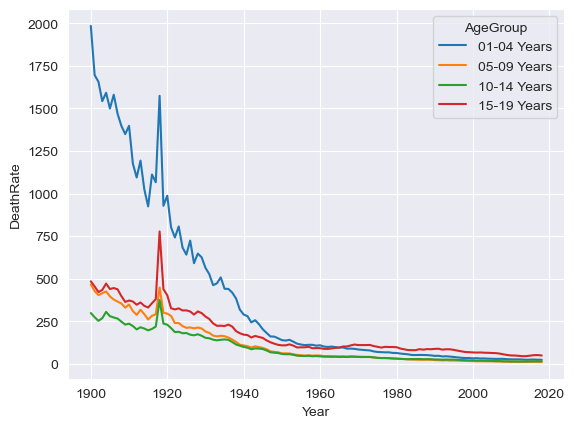

In [15]:
ax = sns.lineplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')
ax.get_figure().savefig('lineChart.png')
ax.get_figure().savefig('lineChart.svg')
ax.get_figure().savefig('lineChart.pdf')

## Line plots

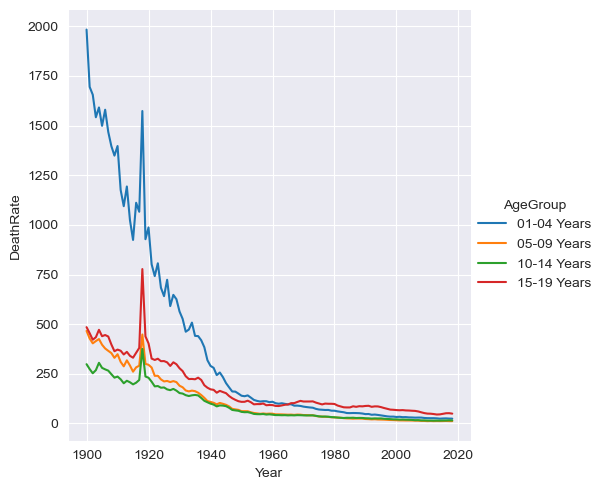

In [16]:
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', 
            hue='AgeGroup')
# If there is only one observation per x value, then there is no confidence interval to plot.

#### <font color='blue'>5. Change cell 17 so the confidence interval for the plot shows the standard deviation.</font>

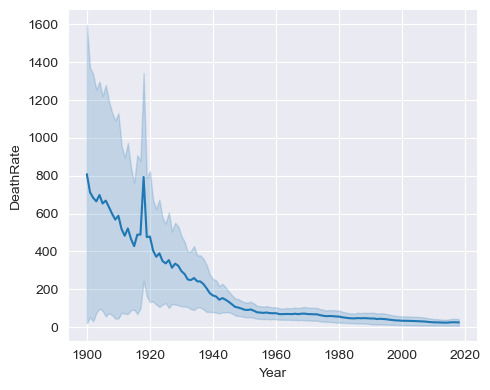

In [17]:
# sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate')
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', 
            ci = 'sd', height = 4, aspect = 1.25)

## Scatter plots

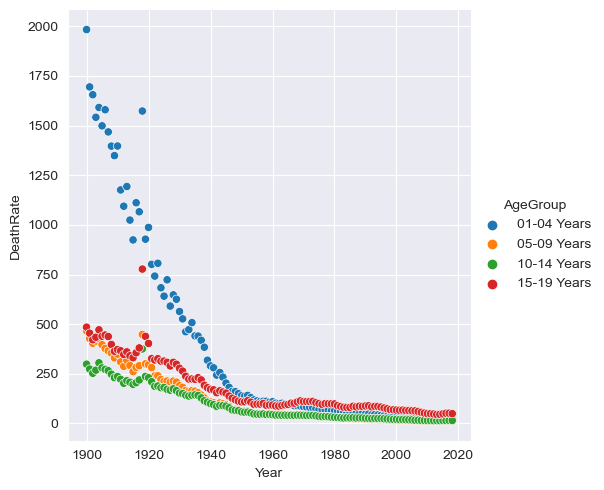

In [18]:
sns.relplot(data = mortality_data, kind = 'scatter',
            x = 'Year', y = 'DeathRate', hue = 'AgeGroup')
# sns.scatterplot(data = mortality_data, x = 'Year', y = 'DeathRate', hue = 'AgeGroup')

#### <font color='blue'>6. Change cell 19 so it uses a specific method to create the scatter plot.</font>

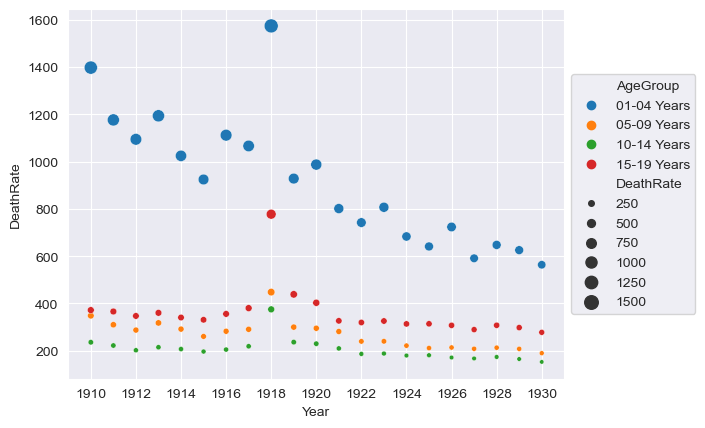

In [19]:
# g = sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'), 
#     kind='scatter', x='Year', y='DeathRate', hue='AgeGroup', 
#     size='DeathRate', sizes=(10,100))
# for ax in g.axes.flat:
#     ax.set(xticks=[x for x in range(1910,1931,2)])
ax = sns.scatterplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'), 
                     x='Year', y='DeathRate', hue='AgeGroup', 
                     size='DeathRate', sizes=(10,100))
ax.set(xticks=[x for x in range(1910,1931,2)])
# Move legend outside figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Bar plots

#### <font color='blue'>7. Change cell 20 so it uses a specific method to create the bar plot, and change the confidence interval to 75. </font>

<Axes: xlabel='Year', ylabel='DeathRate'>

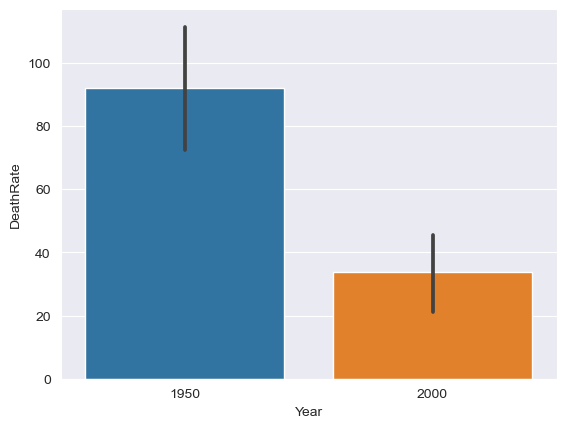

In [20]:
# sns.catplot(data=mortality_data.query('Year in (1950,2000)'), 
#             kind='bar', x='Year', y='DeathRate', ci=50)
sns.barplot(data=mortality_data.query('Year in (1950,2000)'), 
            x='Year', y='DeathRate', ci=75)

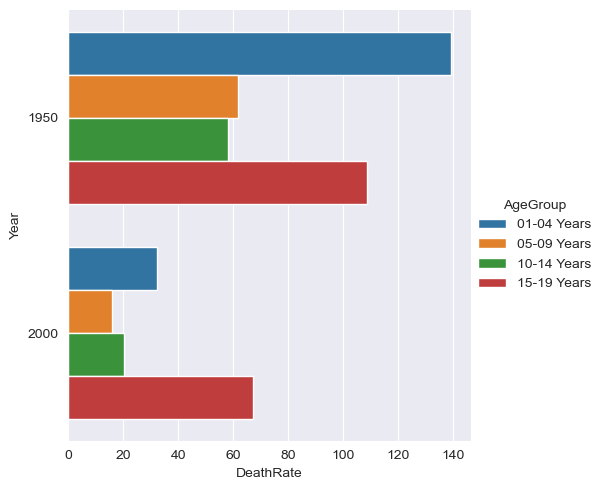

In [21]:
sns.catplot(data=mortality_data.query('Year in (1950,2000)'), kind='bar', 
            x='DeathRate', y='Year', hue='AgeGroup', orient='h')

## Box plots

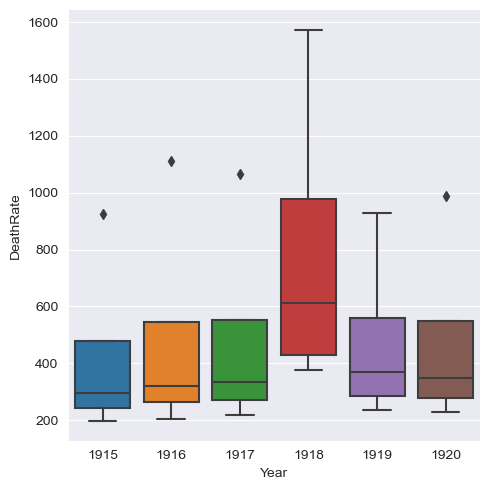

In [22]:
sns.catplot(data=mortality_data.query('Year >= 1915 and Year <= 1920'), 
            kind='box', x='Year', y='DeathRate')

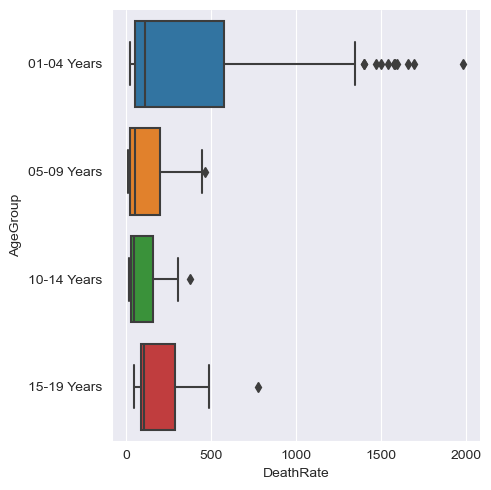

In [23]:
sns.catplot(data=mortality_data,
            kind='box', x='DeathRate', y='AgeGroup', orient='h')

## Histogram

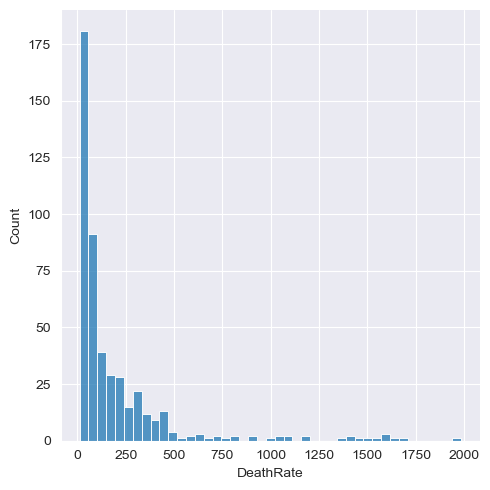

In [24]:
sns.displot(data=mortality_data, kind='hist', x='DeathRate')

#### <font color='blue'>8. Change cell 25 so the histogram uses twice as many bins as it currently does.</font>

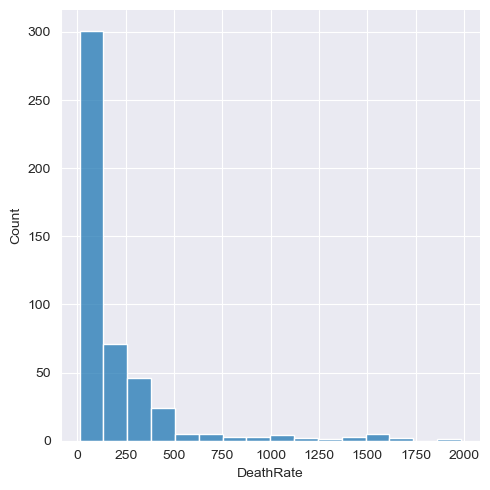

In [25]:
# sns.displot(data=mortality_data, kind='hist', x='DeathRate', bins=8)
sns.displot(data=mortality_data, kind='hist', x='DeathRate', bins=16)

## Prepare some plots of your own
#### <font color='blue'>9. Create a vertical bar plot that shows the deaths rates for the four age groups for the years 1900, 1950, and 2000, and note that the bars represent the average death rates for the three years. Now, modify the plot so it shows the death rates for each of the three years, and increase the width of the plot so it’s 1.8 times the height of the plot.</font>

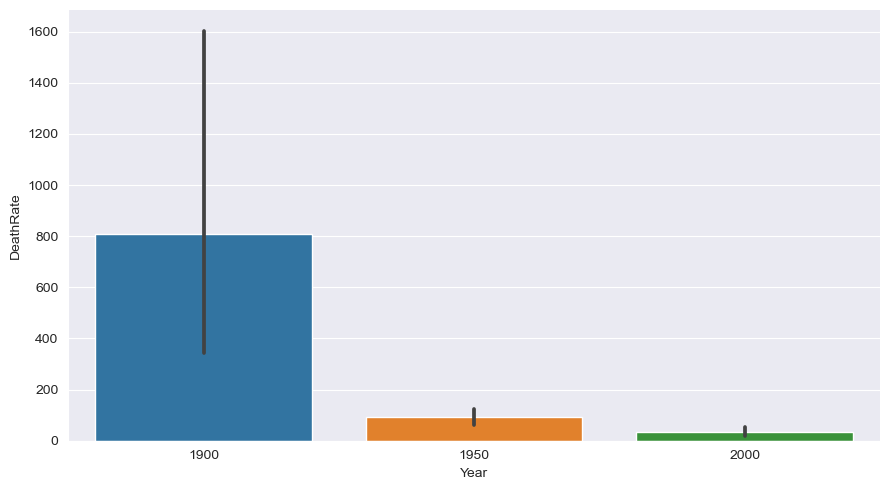

In [26]:
sns.catplot(data = mortality_data.query('Year in (1900, 1950, 2000)'), kind = 'bar',
            x = 'Year', y = 'DeathRate', aspect = 1.8)

#### <font color='blue'>10. Create another plot that displays the same data as the plot you created in step 9, but this time, create a subplot for each of the three years. Display all three subplots in one row.</font>

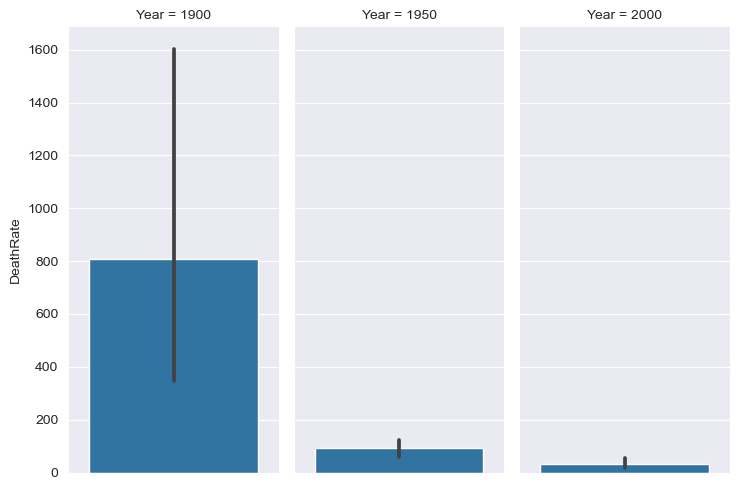

In [27]:
sns.catplot(data = mortality_data.query('Year in (1900, 1950, 2000)'), kind = 'bar',
            y = 'DeathRate', col = 'Year', aspect = 0.5)

#### <font color='blue'>11. Use a specific method to draw a line plot for just the data in the 15-19 age group, and note the values on the y-axis. Modify the plot to include an appropriate title, and change the y-axis label to “Deaths per 100,000”.</font>

[Text(0.5, 1.0, 'Deaths for 15-19 Years Age Group'),
 Text(0, 0.5, 'Deaths per 100,000')]

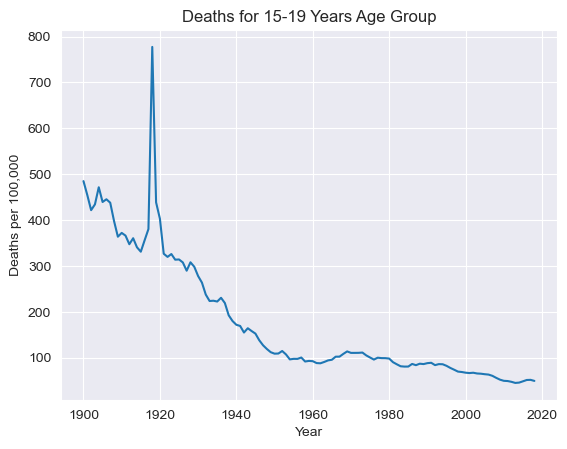

In [28]:
ax = sns.lineplot(data = mortality_data.query('AgeGroup == "15-19 Years"'),
                 x = 'Year', y = 'DeathRate')
ax.set(title = 'Deaths for 15-19 Years Age Group',
       ylabel = 'Deaths per 100,000')

#### <font color='blue'>12. Create a line plot that shows the death rates by age group for the years from 1950 to 2000.</font>

<Axes: xlabel='Year', ylabel='DeathRate'>

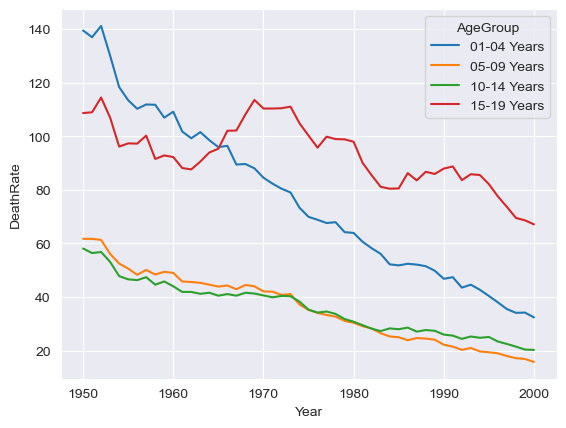

In [29]:
sns.lineplot(data = mortality_data.query('Year >= 1950 and Year <= 2000'),
             x = 'Year', y = 'DeathRate', hue = 'AgeGroup')

#### <font color='blue'>13. Create a scatter plot that displays the same data as the line plot you created in step 12. Set the size and sizes parameters so the plot is easy to read.</font>

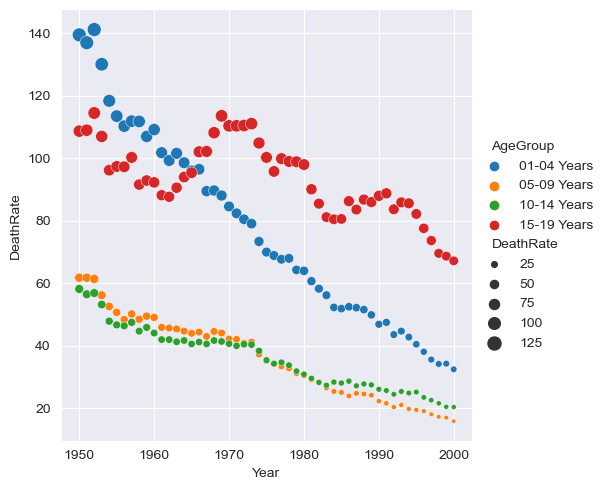

In [30]:
sns.relplot(data = mortality_data.query('Year >= 1950 and Year <= 2000'), kind = 'scatter',
                x = 'Year', y = 'DeathRate', hue = 'AgeGroup', 
                size = 'DeathRate', sizes = (10,100))

#### <font color='blue'>14. Create a plot that contains four bar subplots that display the death rates by age group for the years 1900, 1925, 1950, 1975, and 2000. Display two subplots in each row, and set the height of the plot to an appropriate size. Add a title to the plot, and set the label for the y-axis to “Deaths per 100,000”. Note the position of the title, and then fix it so it’s displayed above the titles for the subplots. Save the plot to a file named barCharts.png in the same folder as the Notebook.
</font>

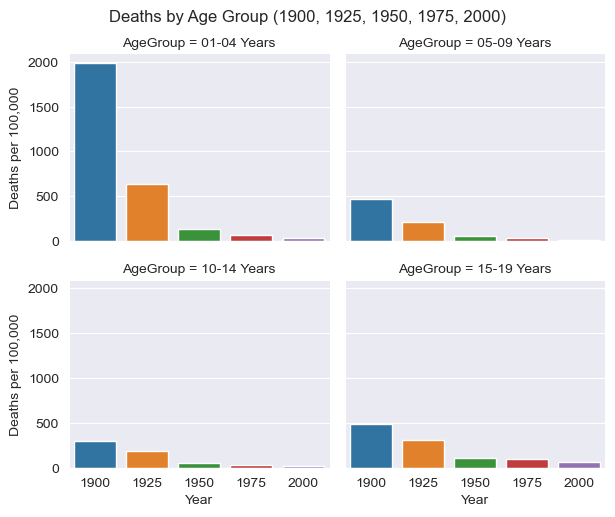

In [31]:
g = sns.catplot(data = mortality_data.query('Year in (1900, 1925, 1950, 1975, 2000)'), kind = 'bar',
            x = 'Year', y = 'DeathRate', col = 'AgeGroup', col_wrap = 2, height = 2.5, aspect = 1.25)
g.fig.suptitle('Deaths by Age Group (1900, 1925, 1950, 1975, 2000)', y = 1.025)
for ax in g.axes.flat:
    ax.set(ylabel = 'Deaths per 100,000')

g.savefig('barCharts.png')